In [111]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
import pickle 

# exploratory data analysis

In [84]:
Xtern_TrainData = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
Xtern_Menu = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Menu.csv")

In [85]:
Xtern_TrainData

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


In [86]:
Xtern_Menu

,Unnamed: 0,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600
5,5,Ultimate Grilled Cheese Sandwich (with bacon a...,6,450
6,6,Sweet Potato Fries,4,200
7,7,Indiana Corn on the Cob (brushed with garlic b...,3,150
8,8,Indiana Buffalo Chicken Tacos (3 tacos),9,400
9,9,Sugar Cream Pie,4,450


In [87]:
Xtern_TrainData

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


<Axes: >

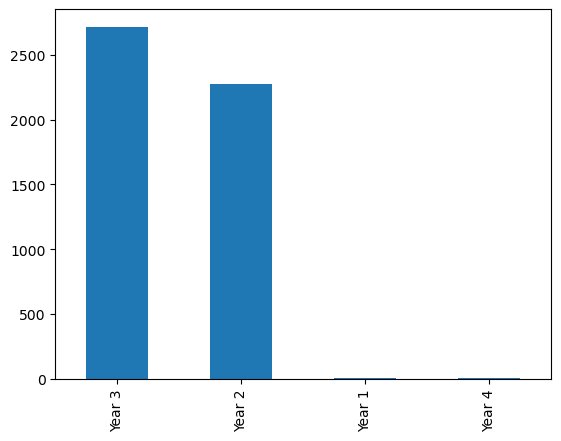

In [88]:
Xtern_TrainData['Year'].value_counts().plot(kind='bar')

Most of the students are from Year 3 and Year 2. The data is very skewed toward these two.

<Axes: >

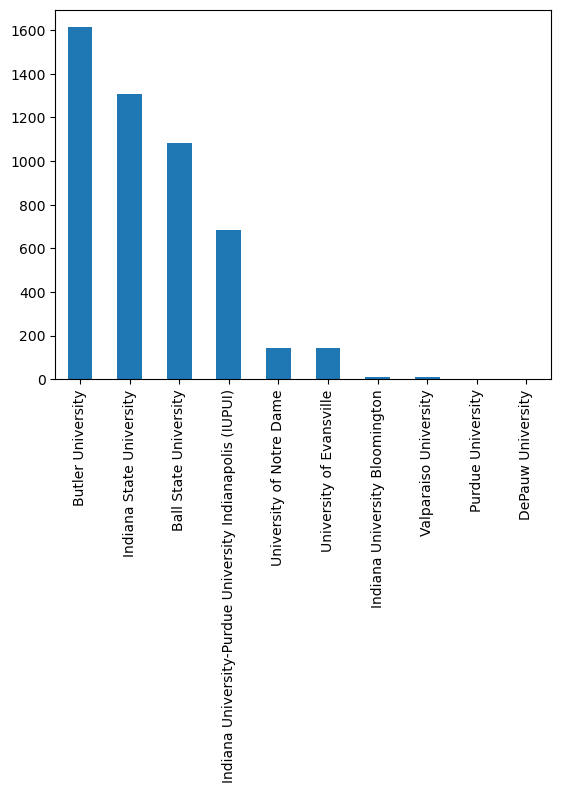

In [109]:
Xtern_TrainData['University'].value_counts().plot(kind='bar')

Most students are from Butler University and Indiana State University.

<Axes: >

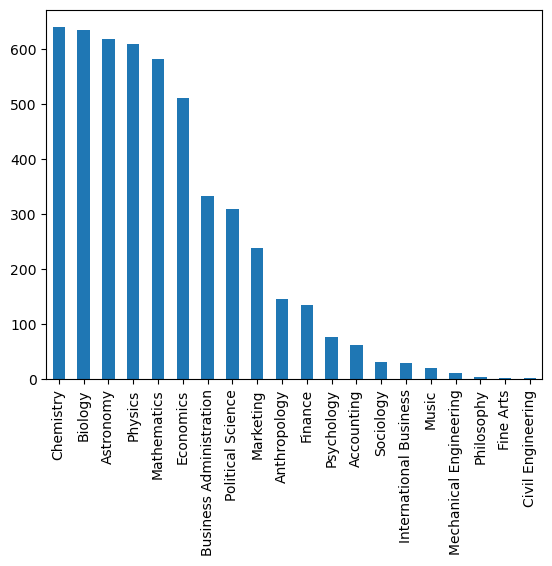

In [110]:
Xtern_TrainData['Major'].value_counts().plot(kind='bar')

Most of the students are from chemistry major and biology major.

<Axes: >

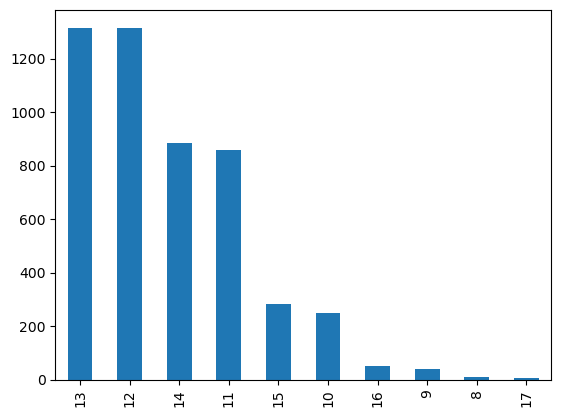

In [90]:
Xtern_TrainData['Time'].value_counts().plot(kind='bar')

Most of the student ordered food around 13pm and 12pm.

<Axes: >

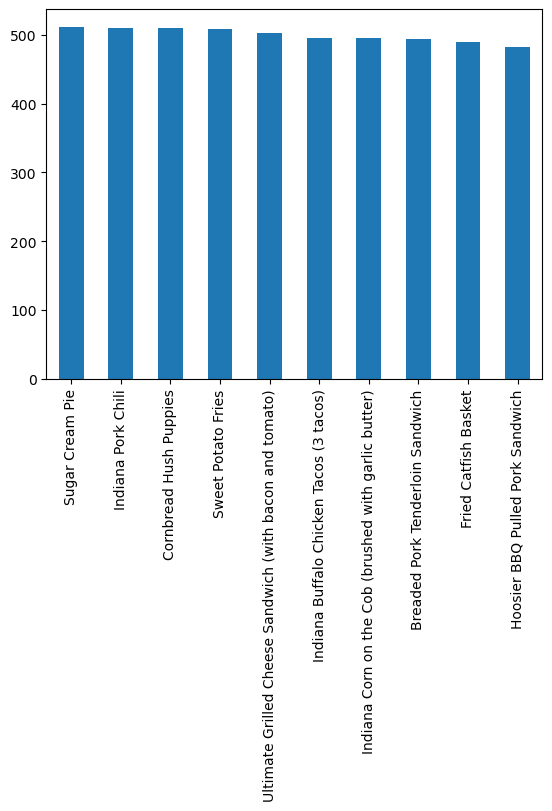

In [91]:
Xtern_TrainData['Order'].value_counts().plot(kind='bar')

The orders were split about evenly among the ten menus.

## suggest any other impactful business use cases for that data

This dataset can be used to predict different kinds of columns in the Xtern_TrainData as well. For example, we can predict the student's year from their choice of food or their major from their choice of food. 


## Discuss Ethical implications of these factors
Collecting a dataset from a public audience, such as college students, might raise some concerns about their privacy. Their privacy should be respected and maintained.

## Discuss Business outcome implications of these factors
The dataset can be used to train AI prediction based on college students' class and major.

## Discuss Technical implications of these factors
The dataset contains various information about a student, including their major, class, university, time, and their choice of food.

In [92]:
Xtern_One_Hot = pd.get_dummies(Xtern_TrainData,columns=['Year','Major','University','Time','Order'])

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
Xtern_One_Hot

,Year_Year 1,Year_Year 2,Year_Year 3,Year_Year 4,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,Major_Economics,Major_Finance,Major_Fine Arts,Major_International Business,Major_Marketing,Major_Mathematics,Major_Mechanical Engineering,Major_Music,Major_Philosophy,Major_Physics,Major_Political Science,Major_Psychology,Major_Sociology,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University,Time_8,Time_9,Time_10,Time_11,Time_12,Time_13,Time_14,Time_15,Time_16,Time_17,Order_Breaded Pork Tenderloin Sandwich,Order_Cornbread Hush Puppies,Order_Fried Catfish Basket,Order_Hoosier BBQ Pulled Pork Sandwich,Order_Indiana Buffalo Chicken Tacos (3 tacos),Order_Indiana Corn on the Cob (brushed with garlic butter),Order_Indiana Pork Chili,Order_Sugar Cream Pie,Order_Sweet Potato Fries,Order_Ultimate Grilled Cheese Sandwich (with bacon and tomato)
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4996,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4997,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4998,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
Xtern_Order = Xtern_One_Hot.loc[:,"Order_Breaded Pork Tenderloin Sandwich":"Order_Ultimate Grilled Cheese Sandwich (with bacon and tomato)":1]

In [96]:
Xtern_Order

,Order_Breaded Pork Tenderloin Sandwich,Order_Cornbread Hush Puppies,Order_Fried Catfish Basket,Order_Hoosier BBQ Pulled Pork Sandwich,Order_Indiana Buffalo Chicken Tacos (3 tacos),Order_Indiana Corn on the Cob (brushed with garlic butter),Order_Indiana Pork Chili,Order_Sugar Cream Pie,Order_Sweet Potato Fries,Order_Ultimate Grilled Cheese Sandwich (with bacon and tomato)
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,1
4997,0,0,0,0,0,0,0,1,0,0
4998,0,0,0,0,0,0,0,1,0,0


In [97]:
Xtern_Others = Xtern_One_Hot.loc[:,"Year_Year 1":"Time_17":1]

In [98]:
Xtern_Others

,Year_Year 1,Year_Year 2,Year_Year 3,Year_Year 4,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,Major_Economics,Major_Finance,Major_Fine Arts,Major_International Business,Major_Marketing,Major_Mathematics,Major_Mechanical Engineering,Major_Music,Major_Philosophy,Major_Physics,Major_Political Science,Major_Psychology,Major_Sociology,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University,Time_8,Time_9,Time_10,Time_11,Time_12,Time_13,Time_14,Time_15,Time_16,Time_17
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4996,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4997,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4998,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
def preprocessing_data(TrainData):
    #transform into machine readable format using one hot encode
    Traindata_one_hot = pd.get_dummies(TrainData,columns=['Year','Major','University','Time','Order'])
    # X label will be Year columns to Time columns
    X = Traindata_one_hot.loc[:,"Year_Year 1":"Time_17":1]
    # Y label which will be used for testing will be all the menu after the column Time
    Y = Traindata_one_hot.loc[:,"Order_Breaded Pork Tenderloin Sandwich":"Order_Ultimate Grilled Cheese Sandwich (with bacon and tomato)":1]
    return X,Y

In [106]:
def train_model(X,Y):
    Xtr, Xts, Ytr, Yts = train_test_split(X,Y,test_size=0.3)
# since this is categories dataset I think using decision tree classifier will fit the situtation the most
    model_dtclassifier = DecisionTreeClassifier()
    model_dtclassifier.fit(Xtr, Ytr)
    y_pred = model_dtclassifier.predict(Xts) 

    accuracy = accuracy_score(Yts, y_pred)
    print(f"accuracy:{accuracy}")
    s = pickle.dump(model_dtclassifier,open('model.joblib', 'wb'))
    return model_dtclassifier

In [107]:
def save_model(model):
    s = pickle.dump(model,open('model.joblib', 'wb'))

In [108]:
X,Y = preprocessing_data(Xtern_TrainData)
model=train_model(X,Y)
save_model(model)

accuracy:0.5653333333333334


## Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

1) model performance 
Based on the accuracy mentioned, I believe this model can be improved through data preprocessing to achieve an accuracy of 80-90%.
2) data size
The dataset is relatively small, containing approximately 5000 data points. To enhance our model's performance, we should consider collecting a larger dataset. With more data, the model can learn more effectively and potentially achieve better results.
3) data distribution
As we can observe from the distribution, the majority of the data is skewed towards one side. By balancing this distribution, we can mitigate bias and potentially improve the model's performance.